In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import kmax as kx
import utility as util
from hierarchy import *
from IPython.core.debugger import set_trace

# Finding Tree Path Covers

### TODO
[ ] Fix path recovery bug (see Test Tree 2)

    [ ] check why 5->23 isn't being added

In [2]:
def draw_tree(tree, layout, draw_path=True):
    rooted_tree = nx.bfs_tree(tree, 0)
    
    # nx.draw_networkx_nodes(tree, pos=layout, node_size=4)
    nx.draw_networkx_labels(tree, pos=layout, font_size=8, font_color="tab:blue")
    
    if draw_path:
        path_cover,_,_=util.path_cover(tree)
        #print(path_cover)
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
        
        other_edges = [(u,v) for u,v in rooted_tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(rooted_tree, pos=layout)

### Test Tree 4

In [3]:
test4 = nx.read_graphml('test4.graphml', node_type=int)
layout = hierarchye_pos(test4, 0)

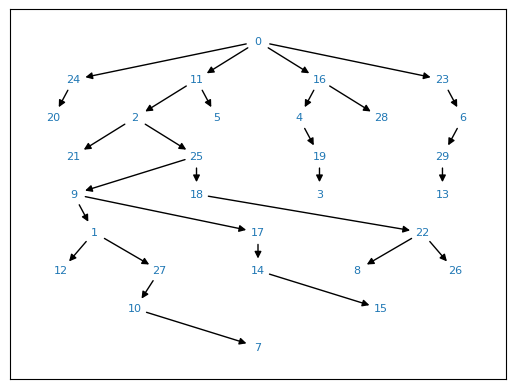

In [4]:
draw_tree(test4, layout, draw_path=False)

ERROR: Undercounting!
-0.3114204091271855
> c:\users\jgodu\desktop\meanfieldlastpassagepercolation\utility.py(141)path_cover()
    139     set_trace()
    140 
--> 141     return path, diff, max_weights[root][0]
    142 
    143 def path_cover_two(tree):



ipdb>  c


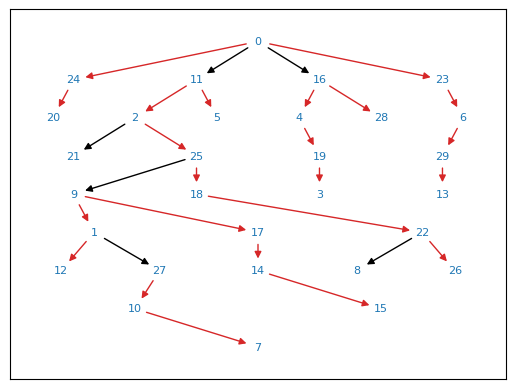

In [5]:
draw_tree(test4, layout)

ERROR: Undercounting!
-0.3114204091271855
> c:\users\jgodu\desktop\meanfieldlastpassagepercolation\utility.py(141)path_cover()
    139     set_trace()
    140 
--> 141     return path, diff, max_weights[root][0]
    142 
    143 def path_cover_two(tree):



ipdb>  max_weights[0]


(12.508499282316496, 0, 24, 23)


ipdb>  c


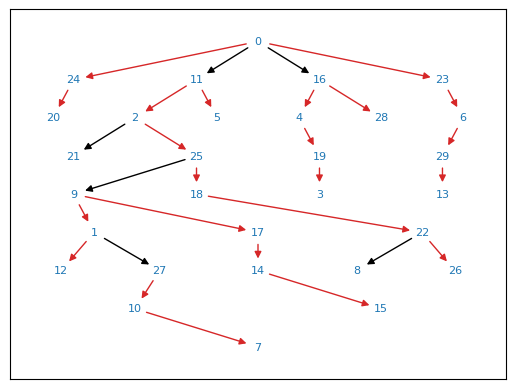

In [6]:
draw_tree(test4, layout)

In [19]:
l

[((0, 11), 0.17201760578380865),
 ((1, 9), 0.28537368796788076),
 ((2, 21), 0.2735745672424852),
 ((4, 19), 0.04849712611499768),
 ((4, 16), 0.14293369955268254),
 ((8, 22), 0.16615318150237324),
 ((9, 25), 0.08843124397144342),
 ((13, 29), 0.14654593321351994),
 ((14, 15), 0.08209119408938514),
 ((18, 25), 0.2847218559578544),
 ((20, 24), 0.06981931783999007)]

In [18]:
edges = nx.get_edge_attributes(test4, 'weight')
l = [(k,v) for k,v in edges.items() if v <= 0.3114204091271855]
[(k,0.3114204091271855 - v) for k,v in l]

[((0, 11), 0.13940280334337685),
 ((1, 9), 0.02604672115930473),
 ((2, 21), 0.037845841884700304),
 ((4, 19), 0.2629232830121878),
 ((4, 16), 0.16848670957450296),
 ((8, 22), 0.14526722762481226),
 ((9, 25), 0.22298916515574208),
 ((13, 29), 0.16487447591366555),
 ((14, 15), 0.22932921503780035),
 ((18, 25), 0.02669855316933112),
 ((20, 24), 0.24160109128719542)]

### Test Tree 3

In [8]:
test_tree3 = nx.read_graphml('test3.graphml', node_type=int)
layout3 = hierarchye_pos(test_tree3, 0)

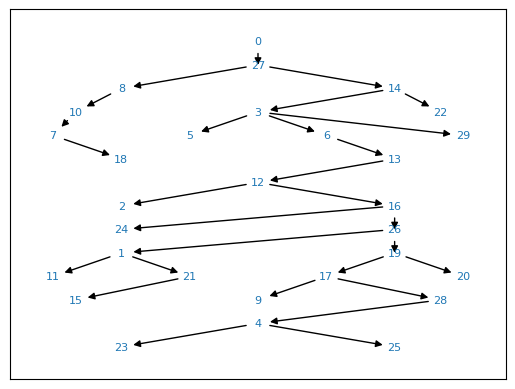

In [9]:
draw_tree(test_tree3, layout3, draw_path=False)

> c:\users\jgodu\desktop\meanfieldlastpassagepercolation\utility.py(141)path_cover()
    139     set_trace()
    140 
--> 141     return path, diff, max_weights[root][0]
    142 
    143 def path_cover_two(tree):

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


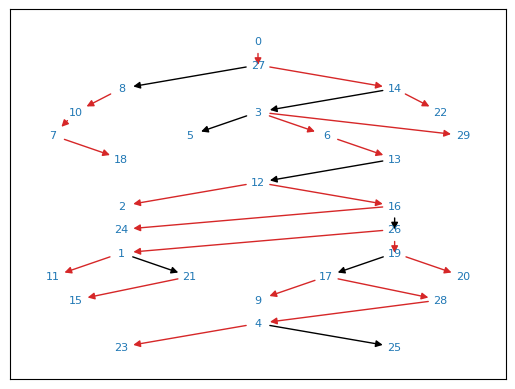

In [10]:
draw_tree(test_tree3, layout3)

> c:\users\jgodu\desktop\meanfieldlastpassagepercolation\utility.py(141)path_cover()
    139     set_trace()
    140 
--> 141     return path, diff, max_weights[root][0]
    142 
    143 def path_cover_two(tree):

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


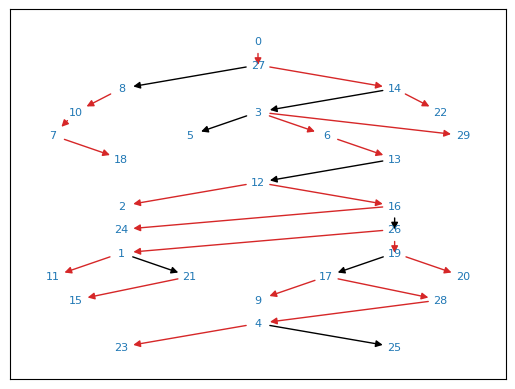

In [11]:
draw_tree(test_tree3, layout3)

### Test Tree 2

In [12]:
test_tree2 = nx.read_graphml('test2.graphml', node_type=int)

> c:\users\jgodu\desktop\meanfieldlastpassagepercolation\utility.py(141)path_cover()
    139     set_trace()
    140 
--> 141     return path, diff, max_weights[root][0]
    142 
    143 def path_cover_two(tree):

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


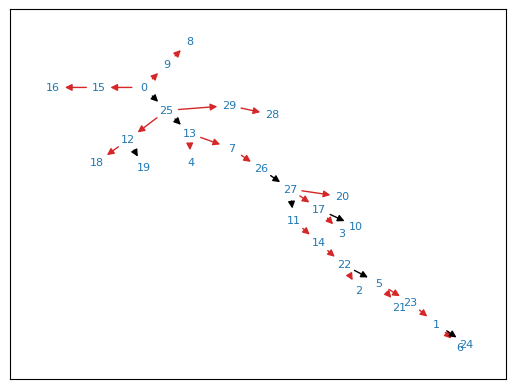

In [13]:
draw_tree(test_tree2, hierarchyc_pos(test_tree2, 0))

In [14]:
weights = nx.get_edge_attributes(test_tree2, 'weight')
weights

{(0, 9): 0.6713299642248209,
 (0, 15): 0.6780263397318991,
 (0, 25): 0.05007476597809102,
 (1, 6): 0.651040256900006,
 (1, 24): 0.2026817067165918,
 (1, 23): 0.2203683735684262,
 (2, 22): 0.7950465128663298,
 (3, 17): 0.274021136671734,
 (4, 13): 0.9323397992625789,
 (5, 21): 0.447258638081242,
 (5, 23): 0.05823788413584208,
 (5, 22): 0.5981424834526826,
 (7, 26): 0.14726814304604874,
 (7, 13): 0.516216852859772,
 (8, 9): 0.3004731180411211,
 (10, 17): 0.05006552196965741,
 (11, 14): 0.5773834209572368,
 (11, 27): 0.1944862303788728,
 (12, 18): 0.42572743115541245,
 (12, 19): 0.293873147609109,
 (12, 25): 0.29841148707596465,
 (13, 25): 0.31045728275902607,
 (14, 22): 0.7498033868978159,
 (15, 16): 0.9042411991169952,
 (17, 27): 0.45255385055525676,
 (20, 27): 0.8801762164504786,
 (25, 29): 0.0416855233576604,
 (26, 27): 0.10267131885221203,
 (28, 29): 0.8007522302265757}

In [15]:
path = {(22, 2), (25, 29), (23, 1), (7, 26), (26, 27), (17, 3), (9, 8), (14, 22), (1, 6), (11, 14), (29, 28), (12, 18), (5, 21), (13, 4), (13, 7), (25, 12), (15, 16), (17, 10), (27, 20), (0, 9), (5, 23), (0, 15)}
total_weight = 0
for u,v in path:
    try:
        total_weight += weights[(u,v)]
    except KeyError:
        total_weight += weights[(v,u)]
print(total_weight)

10.52254475544983


### Test Tree 1

In [16]:
test_tree = nx.read_graphml('test1.graphml', node_type=int)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000204D3C24520>>
Traceback (most recent call last):
  File "C:\Users\jgodu\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
KeyboardInterrupt: 

KeyboardInterrupt



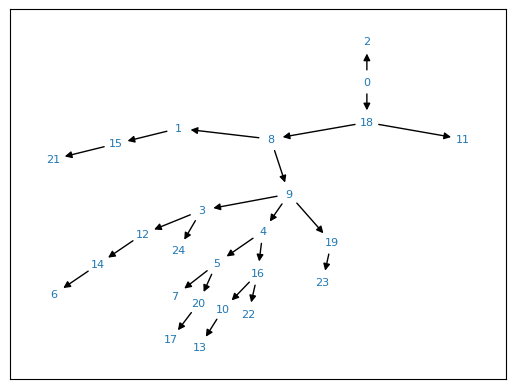

In [16]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0), draw_path=False)

In [ ]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0))

In [ ]:
nx.get_edge_attributes(test_tree, 'weight')

### Unit edge weights

In [ ]:
n = 30
ones_tree = nx.random_labeled_tree(n)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

In [ ]:
#ones_layout = nx.spring_layout(ones_tree)
ones_layout = hierarchyc_pos(ones_tree, 0)
draw_tree(ones_tree, ones_layout, draw_path=False)

In [ ]:
draw_tree(ones_tree, ones_layout)

In [ ]:
util.path_cover_two(ones_tree)

### Random tree with edge weights in (0,1)

In [ ]:
n = 30
tree = nx.random_labeled_tree(n)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

In [ ]:
layout = hierarchye_pos(tree, 0)
draw_tree(tree, layout, draw_path=False)

In [ ]:
draw_tree(tree, layout)

In [ ]:
nx.get_edge_attributes(tree, 'weight')

### Bulk Testing with (0,1)-weights

In [ ]:
failure_count = 0
bad_trees = []
for i in range(1000):
    n = 100
    T = nx.random_labeled_tree(n)
    
    for s,t in T.edges():
        T[s][t]['weight'] = random.random()

    path, diff, x_root = util.path_cover(T)
    if not math.isclose(diff, 0.0, rel_tol=1e-4):
        failure_count += 1
        bad_trees.append(T)

ERROR: Undercounting!
-0.09117068906882508
> c:\users\jgodu\desktop\meanfieldlastpassagepercolation\utility.py(141)path_cover()
    139 
    140     return path, diff, max_weights[root][0]
--> 141 
    142 def path_cover_two(tree):
    143     dag = nx.bfs_tree(tree, 0)



ipdb>  
ipdb>  c


ERROR: Undercounting!
-0.16925000027000436
> c:\users\jgodu\desktop\meanfieldlastpassagepercolation\utility.py(141)path_cover()
    139 
    140     return path, diff, max_weights[root][0]
--> 141 
    142 def path_cover_two(tree):
    143     dag = nx.bfs_tree(tree, 0)



In [ ]:
print(f'failures: {failure_count}')
bad_tree = bad_trees[0]
draw_tree(bad_tree, hierarchye_pos(bad_tree, 0), draw_path=False)

In [ ]:
draw_tree(bad_tree, hierarchye_pos(bad_tree, 0))

In [ ]:
util.path_cover(bad_tree)

In [ ]:
math.isclose(util.path_cover(bad_tree)[1],0.0,rel_tol=1e-4)